In [17]:
import requests
import re 
from bs4 import BeautifulSoup 
import pandas as pd 
import numpy as np 


data = {} 

listofstates = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

URL = "https://www.nytimes.com/interactive/2020/us/states-reopen-map-coronavirus.html"

page = requests.get(URL) 

soup = BeautifulSoup(page.content, 'html.parser')

mydivs = soup.findAll("div", {"class": "g-inner-box"})


statelist = [] 
reopenedplaceslist = [] 
orderexpirationlist = []
reopenedboollist = [] 

for div in mydivs: 
    state = div.find("div", {"data-state" : re.compile(r".*")})['data-state']
    
    statelist.append(state)
    
    try: 
        reopenedbool = div.find("div", {"class": 'g-details-subhed'}).text
    except: 
        reopenedbool = 'Not Reopened'
    
    
    reopenedboollist.append(reopenedbool)
    
    #grab list of reopened places 
    reopenedplaces = div.find_all("div", {"class": 'g-cat-name'})

    #change list of reopenedplaces to text 
    for i in range(len(reopenedplaces)):
        reopenedplaces[i] = reopenedplaces[i].text
    
    reopenedplaceslist.append(reopenedplaces)
    

    
    orderexpiration = div.find("span", {"class": 'g-date-details-text'}).text
    if (orderexpiration.split()[0] == "expired"): 
        orderexpiration = orderexpiration.split()[2] + " " + orderexpiration.split()[3]
        orderexpiration = orderexpiration.replace(".", "")
        
    elif(orderexpiration.split()[0] == "struck" or orderexpiration.split()[0] == "in"): 
        orderexpiration = orderexpiration.split()[3] + " " + orderexpiration.split()[4]
        orderexpiration = orderexpiration.replace(".", "")
    
    orderexpirationlist.append(orderexpiration)
        


    
df = pd.DataFrame() 
df['State'] = statelist
df['Reopened'] = reopenedbool

df['Reopened Places Overview'] = reopenedplaceslist
df['Order Expiration'] = orderexpirationlist    

df['Outdoor and recreation'] = False 
df['Retail'] = False 
df['Food and drink'] = False 
df['Personal care'] = False 
df['Entertainment'] = False 
df['Industries'] = False 
df['Houses of worship'] = False 



## PLEASE NOTE: MARYLAND IS AN EXCEPTION. do not have as granular as wanted. reopening soon is not its own section

for index, row in df.iterrows():
    templist = row["Reopened Places Overview"]
    if "Outdoor and recreation" in templist: 
        df.iloc[index, df.columns.get_loc("Outdoor and recreation")] = True 

    if "Retail" in templist: 
        df.iloc[index, df.columns.get_loc("Retail")] = True 
    
    if "Food and drink" in templist: 
        df.iloc[index, df.columns.get_loc("Food and drink")] = True 

    if "Personal care" in templist: 
        df.iloc[index, df.columns.get_loc("Personal care")] = True 
    if "Entertainment" in templist: 
        df.iloc[index, df.columns.get_loc("Entertainment")] = True
    if "Industries" in templist: 
        df.iloc[index, df.columns.get_loc("Industries")] = True 
    if "Houses of worship" in templist: 
        df.iloc[index, df.columns.get_loc("Houses of worship")] = True  

    
df["Total Count"] = 0  

for i in range(len(df.index)):
    for j in range(len(df.columns)): 
        if(df.iat[i,j] == True): 
            df.iat[i,11] += 1

            
               
import datetime

year = str(datetime.datetime.today().year) 
month = str(datetime.datetime.today().month) 
day = str(datetime.datetime.today().day) 

        
        
df.to_csv('SMB States Reopening NY Times Article ' + year + "." + month + "." + day + '.csv')


In [18]:
df

,State,Reopened,Reopened Places Overview,Order Expiration,Outdoor and recreation,Retail,Food and drink,Personal care,Entertainment,Industries,Houses of worship,Total Count
0,Alabama,Reopened,"[Outdoor and recreation, Retail, Food and drin...",April 30,True,True,True,True,True,False,False,5
1,Alaska,Reopened,"[Food and drink, Retail, Personal care, Outdoo...",April 24,True,True,True,True,True,False,False,5
2,Arizona,Reopened,"[Retail, Personal care, Food and drink, Outdoo...",May 15,True,True,True,True,True,False,False,5
3,Arkansas,Reopened,"[Outdoor and recreation, Personal care, Food a...",Did not have a statewide stay-at-home order.,True,False,True,True,True,False,False,4
4,California,Reopened,"[Industries, Personal care, Food and drink, Ho...",March 19,True,True,True,True,True,True,True,7
5,Colorado,Reopened,"[Personal care, Retail, Industries, Outdoor an...",April 26,True,True,True,True,False,True,False,5
6,Connecticut,Reopened,"[Retail, Personal care, Entertainment, Industr...",May 20,True,True,True,True,True,True,False,6
7,Delaware,Reopened,"[Food and drink, Outdoor and recreation, Retai...",May 31,True,True,True,True,True,False,False,5
8,District of Columbia,Reopened,"[Food and drink, Retail, Entertainment, Outdoo...",May 29,True,True,True,True,True,False,False,5
9,Florida,Reopened,"[Food and drink, Retail, Outdoor and recreatio...",May 4,True,True,True,True,True,False,True,6


# Sandbox

In [16]:
orderexp = "expired on April 30."

if (orderexp.split()[0] == "expired"): 
    orderexp = orderexp.split()[2] + " " + orderexp.split()[3]
    orderexp = orderexp.replace(".", "")
orderexp

'April 30'

In [77]:
#reformat with columns for each type of stuff 
reopenedplaceslist

templist = []

for place in reopenedplaceslist: 
    for p in place: 
        if p not in templist: 
            templist.append(p) 
templist 


# ['Outdoor and recreation',
#  'Retail',
#  'Food and drink',
#  'Personal care',
#  'Entertainment',
#  'Industries',
#  'Houses of worship']

['Outdoor and recreation',
 'Retail',
 'Food and drink',
 'Personal care',
 'Entertainment',
 'Industries',
 'Houses of worship']

In [99]:
pdata = pd.read_csv("politicalparty.csv", header = None) 
# Preview the first 5 lines of the loaded data 
for i in range(len(pdata.index)):
    pdata.iat[i,0] = pdata.iat[i,0].replace("Governor of", "").strip() 

left = pd.DataFrame() 
left = pd.merge(left=df, right=pdata, how='left', left_on='State', right_on=0)
left = left.drop(columns = ["0_y", "1_y","3_y", "3_x", "0_x", "2_y"])
abbrevdata = pd.read_csv("abbrev.csv", header = None)
left = pd.merge(left=left, right=abbrevdata, how='left', left_on='State', right_on=0)
left = left.drop(columns = [0,1])
left = left.rename(columns={'1_x': 'Governor', '2_x': 'Party', 2: "Abbreviation"})

df = left 
df

,State,Reopened,Reopened Places Overview,Order Expiration,Outdoor and recreation,Retail,Food and drink,Personal care,Entertainment,Industries,Houses of worship,Total Count,Governor,Party,Abbreviation
0,Alabama,Reopened,"[Outdoor and recreation, Retail, Food and drin...",April 30,True,True,True,True,True,False,False,5,Kay Ivey,Republican,AL
1,Alaska,Reopened,"[Food and drink, Retail, Personal care, Outdoo...",April 24,True,True,True,True,True,False,False,5,Mike Dunleavy,Republican,AK
2,Arizona,Reopened,"[Retail, Personal care, Food and drink, Outdoo...",May 15,True,True,True,True,True,False,False,5,Doug Ducey,Republican,AZ
3,Arkansas,Reopened,"[Outdoor and recreation, Personal care, Food a...",Did not have a statewide stay-at-home order.,True,False,True,True,True,False,False,4,Asa Hutchinson,Republican,AR
4,California,Reopened,"[Industries, Personal care, Food and drink, Ho...",March 19,True,True,True,True,True,True,True,7,Gavin Newsom,Democratic,CA
5,Colorado,Reopened,"[Personal care, Retail, Industries, Outdoor an...",April 26,True,True,True,True,False,True,False,5,Jared Polis,Democratic,CO
6,Connecticut,Reopened,"[Retail, Personal care, Entertainment, Industr...",May 20,True,True,True,True,True,True,False,6,Ned Lamont,Democratic,CT
7,Delaware,Reopened,"[Food and drink, Outdoor and recreation, Retai...",May 31,True,True,True,True,True,False,False,5,John C. Carney Jr.,Democratic,DE
8,District of Columbia,Reopened,"[Food and drink, Retail, Entertainment, Outdoo...",May 29,True,True,True,True,True,False,False,5,NaN,NaN,DC
9,Florida,Reopened,"[Food and drink, Retail, Outdoor and recreatio...",May 4,True,True,True,True,True,False,True,6,Ron DeSantis,Republican,FL


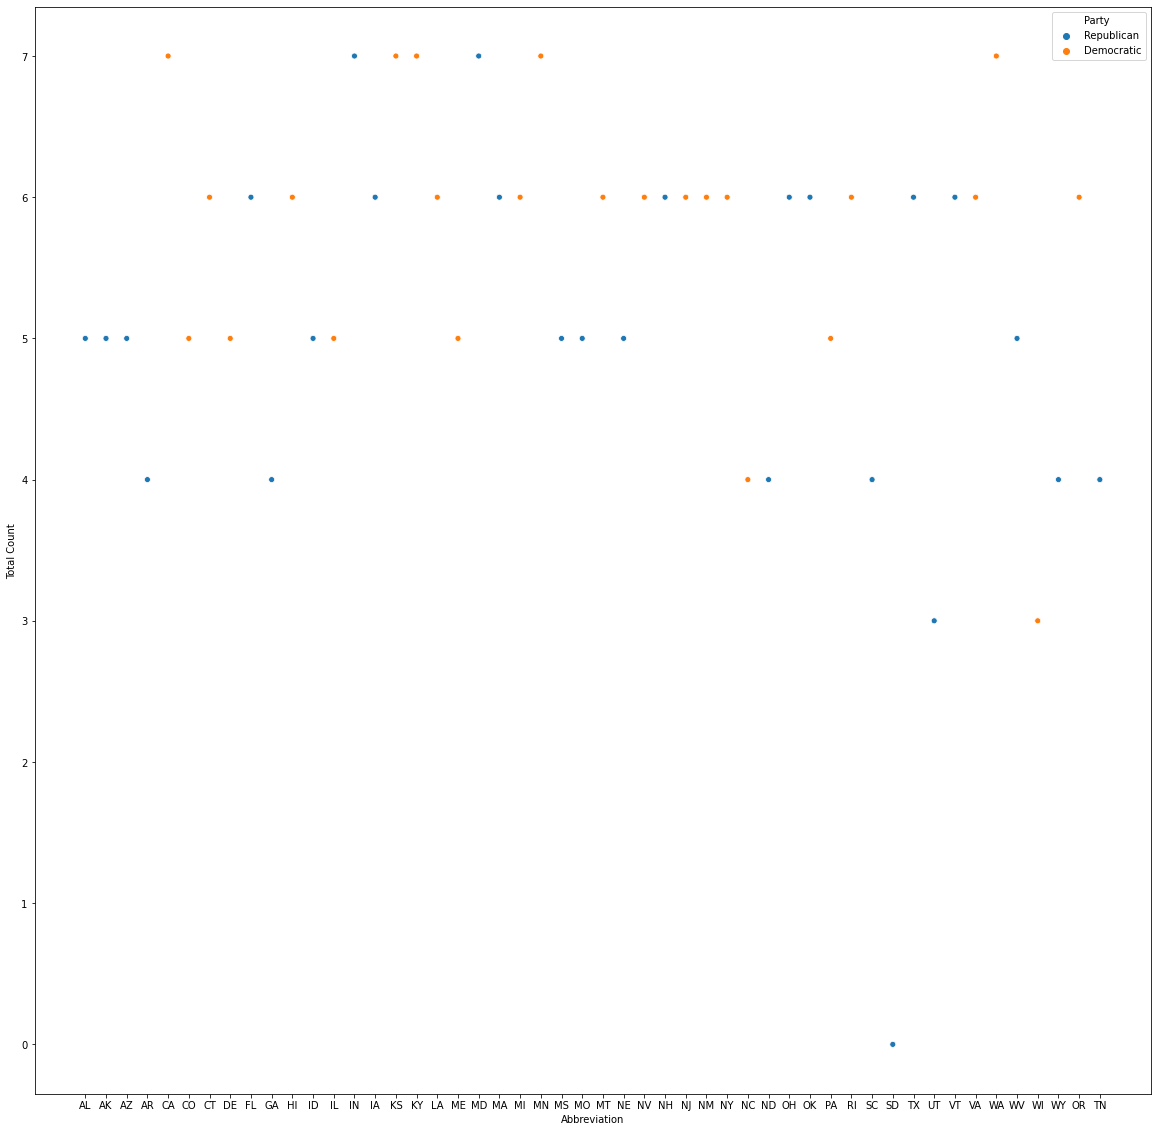

In [102]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline 
a4_dims = (20,20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax = ax, x="Abbreviation", y="Total Count", hue = "Party", data=df)

